# Nombre de cas positifs COVID 19 en France par jour et par département

## Imports

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import os

## Téléchargement et sauvegarde du fichier csv des nouvelles contaminations (les données sont mises à jour au quotidien)

In [2]:
url = "https://www.data.gouv.fr/fr/datasets/r/426bab53-e3f5-4c6a-9d54-dba4442b3dbc"
file_name = "incidence.csv"

In [3]:
response = requests.get(url)
if response.status_code == 200:
    print("Requête OK")

Requête OK


### Écriture du fichier sur le disque

In [4]:
with open(file_name, "w") as csv_file:
    csv_file.write(response.text)

### Fonction qui va créer la DataFrame propre

In [5]:
def get_data():
    data = pd.read_csv(file_name, sep=";", dtype={'dep': str})

    # mettre la colonne jour en datetime
    data.jour = pd.to_datetime(data.jour)
    
    columns_to_numerize = ['pop', 'P', 'T', 'Ti']
  
    
    for col in columns_to_numerize:
        data[col] = data[col].apply(lambda s: float(f"{s[:-3]}.{s[-2:]}"))

    # Garder uniquement cl_age90 0 qui est la somme des positifs de toutes les classes d'âge
    data = data.loc[data.cl_age90 == 0]
    return data.reset_index().drop(columns=['index', 'cl_age90'])

In [6]:
data = get_data()

In [7]:
data.sample(5)

,dep,jour,pop,P,T,Ti,Tp,Td
38236,51,2022-01-01,563823.0,187.0,1226.0,33.17,"15,25","217,44"
66002,89,2021-03-29,332096.0,175.0,2772.0,52.70,"6,31","834,70"
64263,87,2020-07-09,370774.0,0.0,143.0,0.00,"0,00","38,57"
37178,50,2021-02-15,490669.0,107.0,2281.0,21.81,"4,69","464,88"
58457,79,2020-10-15,372627.0,57.0,1103.0,15.30,"5,17","296,01"


In [8]:
data[data.dep == '69']

,dep,jour,pop,P,T,Ti,Tp,Td
50922,69,2020-05-13,1876051.0,20.0,1468.0,1.07,"1,36","78,25"
50923,69,2020-05-14,1876051.0,41.0,1532.0,2.19,"2,68","81,66"
50924,69,2020-05-15,1876051.0,26.0,1538.0,1.39,"1,69","81,98"
50925,69,2020-05-16,1876051.0,12.0,478.0,0.64,"2,51","25,48"
50926,69,2020-05-17,1876051.0,8.0,247.0,0.43,"3,24","13,17"
...,...,...,...,...,...,...,...,...
51655,69,2022-05-16,1876051.0,1250.0,7435.0,66.63,"16,81","396,31"
51656,69,2022-05-17,1876051.0,780.0,5432.0,41.58,"14,36","289,54"
51657,69,2022-05-18,1876051.0,749.0,5273.0,39.92,"14,20","281,07"
51658,69,2022-05-19,1876051.0,649.0,4333.0,34.59,"14,98","230,96"


## On regroupe par département et par jour

In [9]:
sum_by_day = data.groupby(["dep", "jour"]).sum().drop(columns=["pop"])

## Graphe. Changer le numéro de département pour celui que vou voulez.

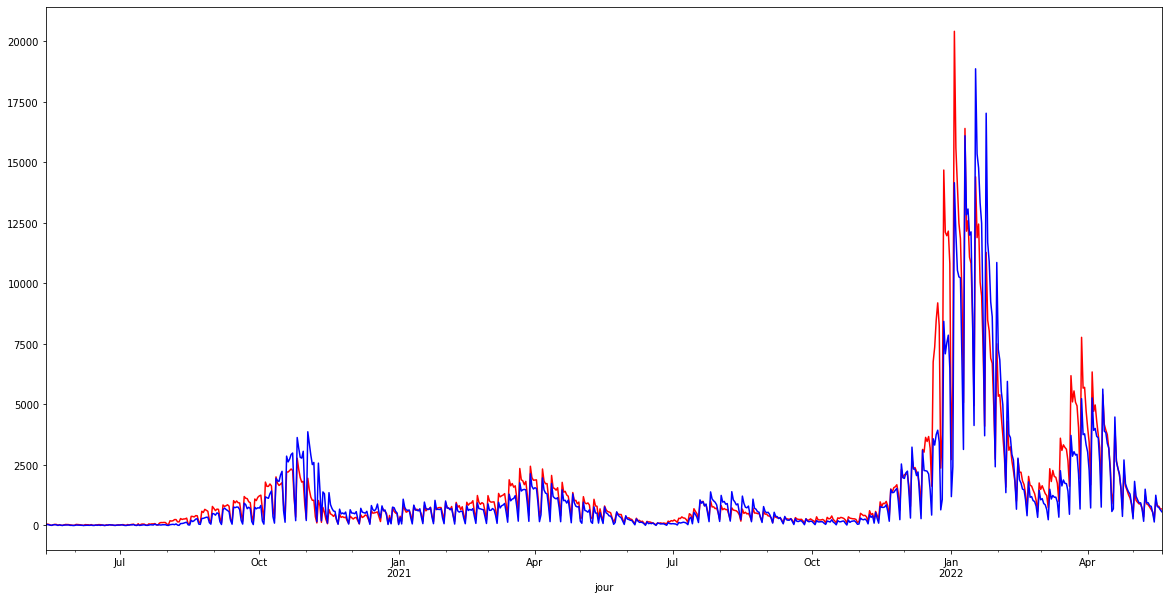

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))

sum_by_day.loc["75", "P"].plot(c='r', ax=ax)
sum_by_day.loc["69", "P"].plot(c='b', ax=ax);

## On efface les fichiers csv dans le dossier

In [11]:
csv_files = [f for f in os.listdir() if f.endswith('csv')]

for f in csv_files:
    os.remove(f)